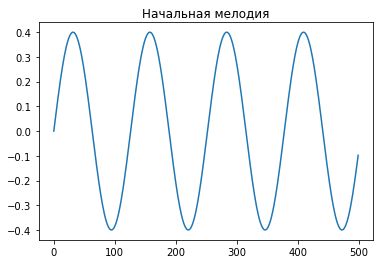

In [9]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt


duration = 0.3
fs = 44000
amplitude = 0.4  

timeSamples = np.arange(np.ceil(duration * fs)) / fs

F1 = amplitude * np.sin(2 * np.pi * 349.23 * timeSamples)
E = amplitude * np.sin(2 * np.pi * 329.63 * timeSamples)
D = amplitude * np.sin(2 * np.pi * 293.66 * timeSamples)
C = amplitude * np.sin(2 * np.pi * 261.63 * timeSamples)
B = amplitude * np.sin(2 * np.pi * 246.96 * timeSamples)
A = amplitude * np.sin(2 * np.pi * 220.00 * timeSamples)
Q = amplitude * np.sin(1 * np.pi * 1 * timeSamples)

s1 = np.concatenate((F1, F1, E, E), axis=0)
s2 = np.concatenate((D, D, D, E), axis=0)
s3 = np.concatenate((D, Q, D, Q), axis=0)
s4 = np.concatenate((C, C, B, B), axis=0)
s5 = np.concatenate((A, A, A, B), axis=0)
s6 = np.concatenate((A, Q, A, Q), axis=0)
fullMelody = np.concatenate((s1,s2,s1,s3,s4,s5,s4,s6))

#sd.play(fullMelody, fs, None,1)
plt.title('Начальная мелодия')
plt.plot(fullMelody[:500])
plt.show()



211201
211201


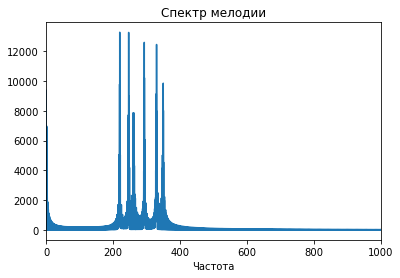

In [13]:
spector = np.fft.rfft(fullMelody)


N = int(duration * fs * 32)
x_axis = np.fft.rfftfreq(N, 1/fs)

print(len(x_axis))
print(len(np.abs(spector)))

plt.title('Спектр мелодии')
plt.plot(x_axis, np.abs(spector))
plt.xlabel('Частота')
plt.xlim([0, 1000])
plt.show()

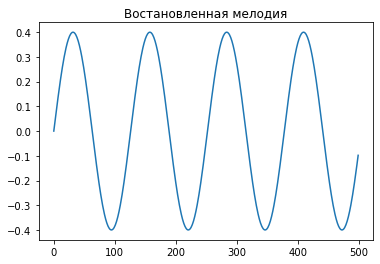

In [14]:
restoredMelody = np.fft.irfft(spector)
#sd.play(restoredMelody, fs, None,1)

plt.title('Востановленная мелодия')
plt.plot(restoredMelody[:500])
plt.show()

In [15]:
fs=100000

recDuration = 3  # seconds
myrecording = sd.rec(recDuration * fs, samplerate=fs, channels=1,dtype='float64')
print ("Recording Audio")
sd.wait()
print ("Audio recording complete , Play Audio")
sd.play(myrecording, fs)
sd.wait()
print ("Play Audio Complete")

Recording Audio
Audio recording complete , Play Audio
Play Audio Complete


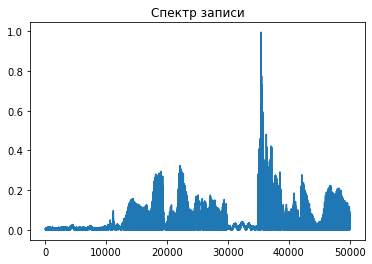

In [16]:
fs=100000
voiceFFT = np.fft.rfft(myrecording)
N = int(2 * recDuration * fs) 
x_axis = np.fft.rfftfreq(N-1, 1/fs)

plt.title('Спектр записи')
plt.plot(x_axis, np.abs(voiceFFT))
plt.show()